# Example of usage 

### Install library

In [1]:
# !pip install praat-textgrids

### Load data from kaggle

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import math
from glob import glob
import pickle
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

### Define the function extracting the ground truth labels

It's important for this kind of tasks to perform short time analysis on the signal, so it needs to assign the lables (SPEECH/NONSPEECH) to very little portions of the signal. I decide to split the data into portion of 30 milliseconds.

In [3]:
import textgrids

FRAME_DURATION = 20 # 20 msec

def readFile(path : str, frame_len_ms : int = 20 ):
    '''
    Read the file and return the list of SPEECH/NONSPEECH labels for each frame
    '''
    frame_len = frame_len_ms * 16
    labeled_list  = []
    grid = textgrids.TextGrid(path)
    len_x = math.ceil(grid.xmax * 16_000)
    for interval in grid['silences']:
        label = int(interval.text)
        
        dur = interval.dur
        len_dur = int(round(dur * 16_000))
        if label == 0:
            labeled_list = labeled_list + [0] * len_dur
        else: 
            labeled_list = labeled_list + [1] * len_dur
            
    len_l = len(labeled_list)
    extra = len_x - len_l
    if extra > 0:
        if label == 0:
            labeled_list = labeled_list + [0] * extra
        else: 
            labeled_list = labeled_list + [1] * extra
    else:
        labeled_list = labeled_list[:len_x]

    labeled_np = np.array(labeled_list)

    framed_label = []
    for i in range(0, len_x,frame_len):
        if np.mean(labeled_np[i:i+frame_len]) > 0.5:
            framed_label = framed_label + [1]
        else:
            framed_label = framed_label + [0]

    return framed_label

In [4]:
labels_filenames = glob("Annotation/Female/*/*.TextGrid") + \
    glob("Annotation/Male/*/*.TextGrid") + glob("Annotation/NoNoise/*.TextGrid")
len(labels_filenames)

539

In [5]:
for annotation_path  in labels_filenames:
    framed_label= readFile(annotation_path)
    file_name = annotation_path.split("Annotation/")[-1].split(".TextGrid")[0].replace("/", "_")
    with open(os.path.join("/home/dllabsharif/Documents/DATASETS/clean_dataset/vad_labels/TIMIT",
                        file_name+'.txt'), 'wb') as handle:
        pickle.dump(framed_label, handle)

In [8]:
with open('/home/dllabsharif/Documents/DATASETS/clean_dataset/vad_labels/TIMIT/Female_PTDB-TUG_mic_F02_si822.txt', 'rb') as handle:
    b = pickle.load(handle)

In [12]:
len(b), b[200:]

(434,
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

## Load a file

In [6]:
import librosa

root ='/Female/TIMIT/SA2'
annotation_path = "Annotation/Female/TMIT/SI2220.TextGrid"
audio_path = "Audio/Female/TMIT/SI2220.wav"

# read wav file
data, fs = librosa.load(audio_path, sr = 16_000)

# read annotaion
framed_label= readFile(annotation_path)



In [7]:
fs, len(data), len(label_list), len(framed_label)

NameError: name 'label_list' is not defined

In [ ]:
147 * 320 - 320

46720

## Plot signal

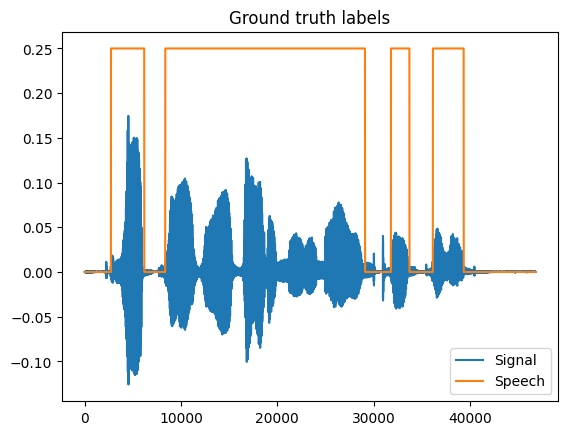

In [ ]:
import matplotlib.pyplot as plt

figure = plt.Figure(figsize=(10, 7), dpi=85)

plt.plot(data)
plt.plot(0.25*np.array(label_list))
plt.plot(0.25*np.array(label_list))
plt.title("Ground truth labels")
plt.legend(['Signal', 'Speech'])
plt.show()

In [ ]:
print(len(label_list))
print(len(t))
print(len(data))

46797
46797
46797
